Load importance scores. In this example, these are the importance scores for the positive examples for task 0 in the talgata simulation from the deeplift paper (analysis is done on the test set)

File talgata_task0_positives_scores.npy exists already
(236, 200, 4)


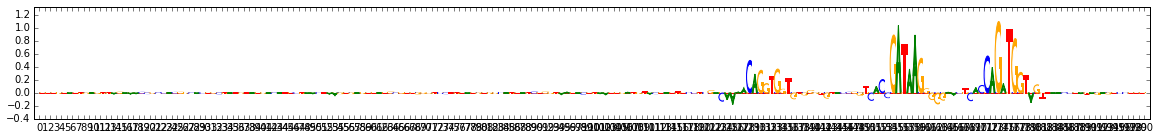

In [1]:
!./grab_data.sh

%matplotlib inline
import numpy as np
scores = np.load("talgata_task0_positives_scores.npy")
onehot_seq = (np.abs(scores) > 0)*1.0
print(scores.shape)
from modisco.visualization import viz_sequence
viz_sequence.plot_weights(scores[0])

In [3]:
from modisco import core
score_track = core.DataTrack(name="scores", fwd_tracks=scores,
                             rev_tracks=scores[:,::-1,::-1],
                             has_pos_axis=True)
onehot_track = core.DataTrack(name="sequence", fwd_tracks=onehot_seq,
                               rev_tracks=onehot_seq[:,::-1,::-1],
                               has_pos_axis=True)
track_set = core.TrackSet(data_tracks=[score_track, onehot_track])

In [27]:
from modisco import coordproducers
seqlets = track_set.create_seqlets(track_names=["scores","sequence"],
                                   coords=coordproducers.FixedWindowAroundChunks(
                                            sliding=7, flank=2,
                                            suppress=3, min_ratio=0.5,
                                            max_seqlets_per_seq=5,
                                            batch_size=50, progress_update=5000,
                                            verbose=True).get_coords(np.sum(scores, axis=2)))
print(len(seqlets))
#sort the seqlets by strength
seqlets = sorted(seqlets, key=lambda x: -np.sum(x["scores"].fwd))

Compiling functions
Computing window sums
('Done', 0)
Identifying seqlet coordinates
('Done', 0)
('Done', 0)
('Done', 0)
('Done', 0)
('Done', 0)
792


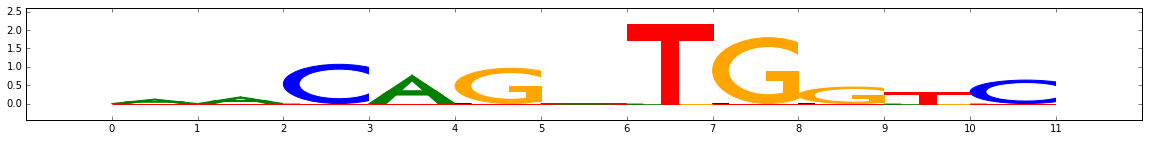

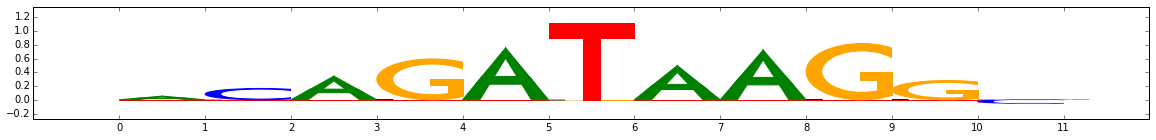

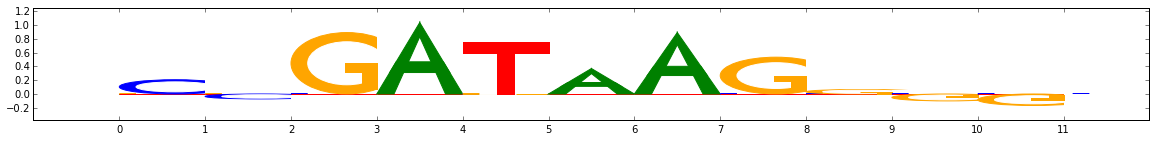

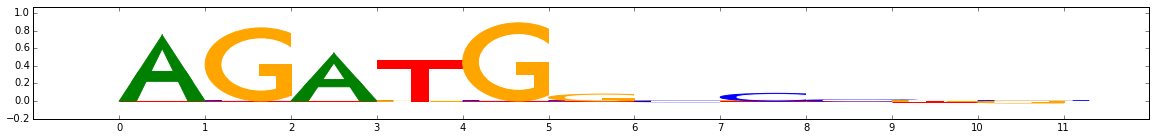

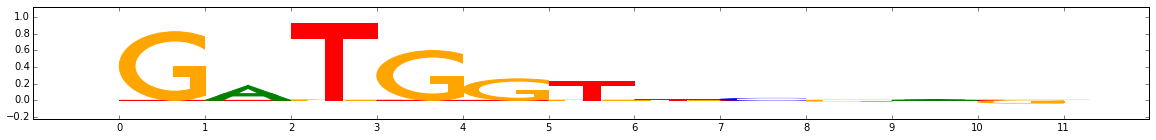

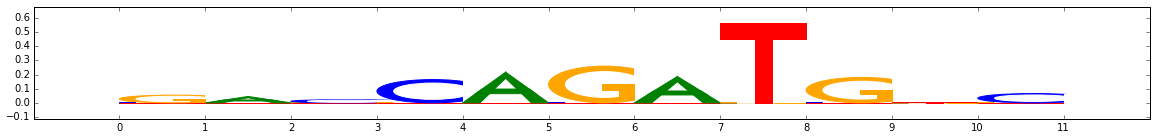

In [29]:
#print 5 seqlets drawn from across the range, as a sanity check
for i in range(0,len(seqlets),int(len(seqlets)/5)):
    viz_sequence.plot_weights(seqlets[i]["scores"].fwd)